In [29]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

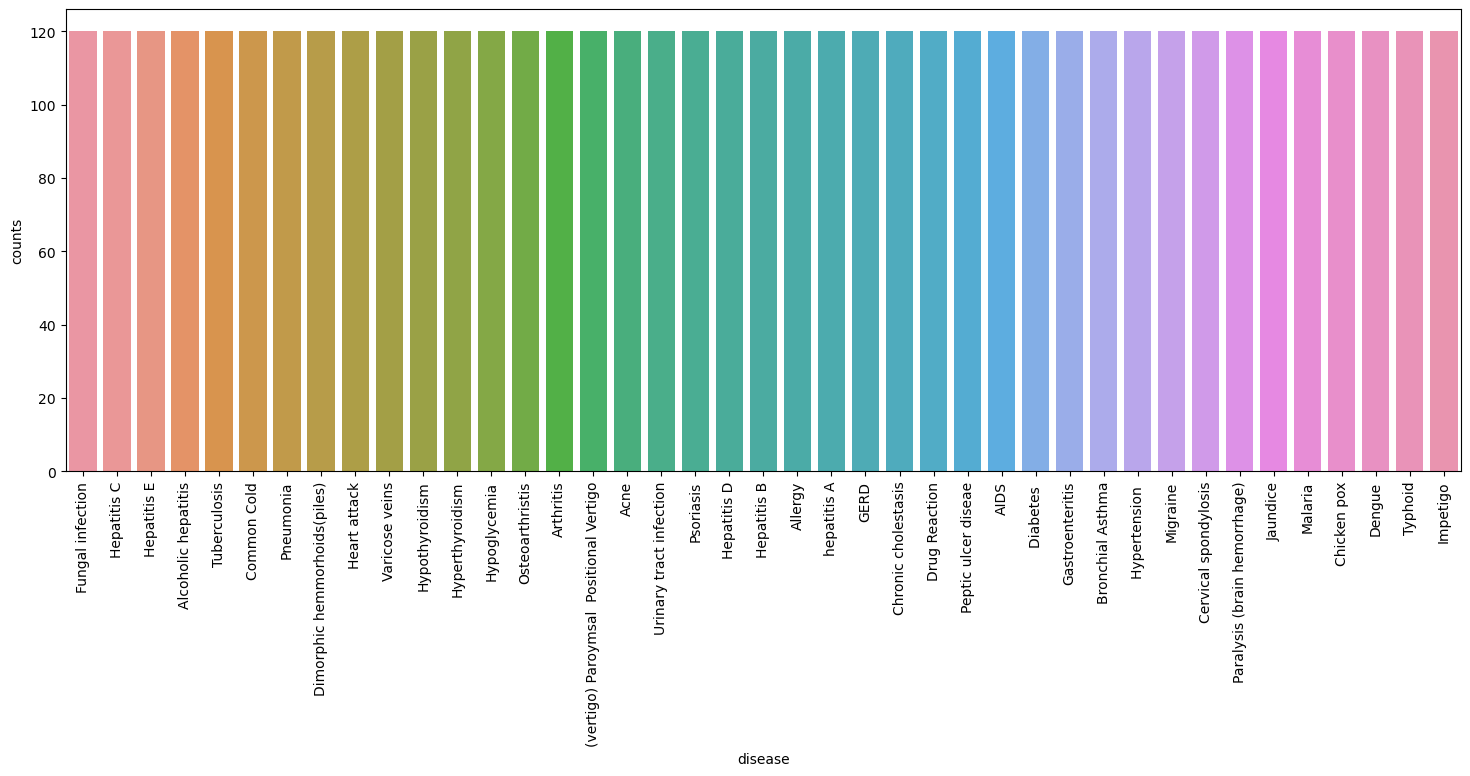

In [30]:
# Reading the train.csv by removing the 
# last column since it's an empty column
data_path= 'dataset/Training.csv'
dataset= pd.read_csv(data_path).dropna(axis= 1)
# Checking whether the dataset is balanced or not
disease_count= dataset['prognosis'].value_counts()
temp_df= pd.DataFrame({
    'disease': disease_count.index,
    'counts': disease_count.values
})
plt.figure(figsize= (18, 6))
sns.barplot(x= 'disease', y= 'counts', data= temp_df)
plt.xticks(rotation= 90)
plt.show()

In [31]:
#encoding to target values to
#numerical values using LabelEncoder
encoder= LabelEncoder()
dataset['prognosis']= encoder.fit_transform(dataset['prognosis'])

In [32]:
X= dataset.iloc[:, : -1]
Y= dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test= train_test_split(
X, Y, test_size= 0.2, random_state= 24)

In [33]:
print(f"Train: {X_train.shape}, {Y_train.shape}")
print(f"Test: {X_test.shape}, {Y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [34]:
# Defining scoring metric for k-fold cross validation
def scoring_cv(estimator, X, Y):
    scores= accuracy_score(Y, estimator.predict(X))
    return scores

# Initializing Models
models={
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'RnadomForrest': RandomForestClassifier(random_state=18)
}
# Producing cross validation score for the models
for model_name in models:
    model= models[model_name]
    scores= cross_val_score(model, X, Y,cv= 10, n_jobs= -1)
    
    
    print('--' *30)
    print(model_name)
    print(f'scores: {scores}')
    print(f'mean score: {np.mean(scores)}')

------------------------------------------------------------
SVC
scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score: 1.0
------------------------------------------------------------
GaussianNB
scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score: 1.0
------------------------------------------------------------
RnadomForrest
scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean score: 1.0


accuracy score based on training data using SVM classifier      :100.0
accuracy score based on test data using SVM classifier      :100.0


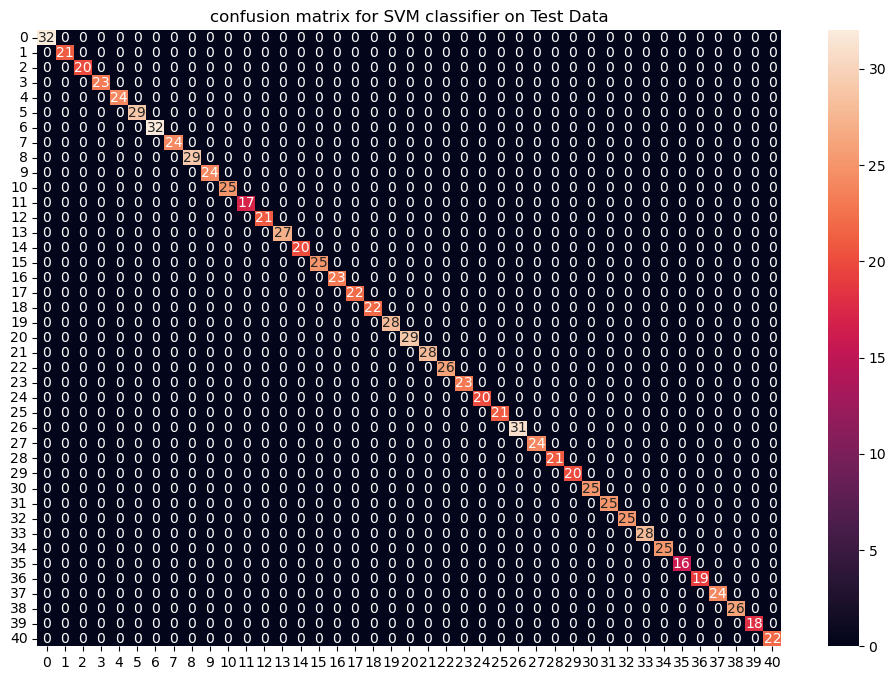

In [35]:
# Training and testing SVM Classifier
svm_model= SVC()
svm_model.fit(X_train, Y_train)
preds= svm_model.predict(X_test)
print(f'accuracy score based on training data using SVM classifier\
      :{accuracy_score(Y_train, svm_model.predict(X_train)) * 100}')
print(f'accuracy score based on test data using SVM classifier\
      :{accuracy_score(Y_test, svm_model.predict(X_test)) * 100}')
cf_matrix= confusion_matrix(Y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title('confusion matrix for SVM classifier on Test Data')
plt.show()

accuracy score based on training data using Naive Bayes classifier      :100.0
accuracy score based on test data using Naive Bayes classifier      :100.0


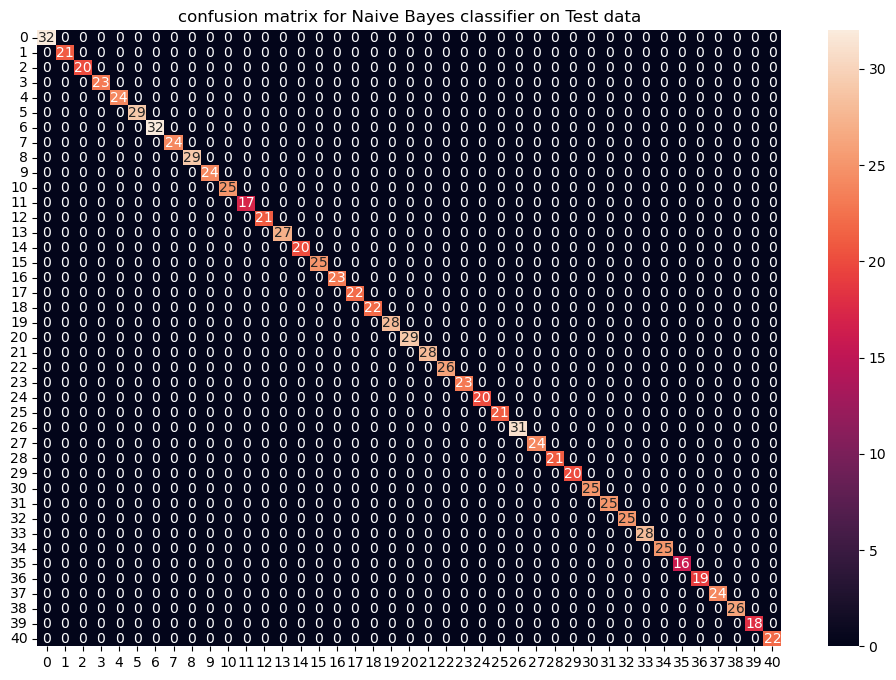

In [36]:
# Training and testing Naive Bayes Classifier
nb_model= GaussianNB()
nb_model.fit(X_train, Y_train)
preds= nb_model.predict(X_test)
print(f'accuracy score based on training data using Naive Bayes classifier\
      :{accuracy_score(Y_train, nb_model.predict(X_train)) * 100}')
print(f'accuracy score based on test data using Naive Bayes classifier\
      :{accuracy_score(Y_test, nb_model.predict(X_test)) * 100}')
cf_matrix= confusion_matrix(Y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title('confusion matrix for Naive Bayes classifier on Test data')
plt.show()

accuracy score based on training data using Random Forrest Classifier      :100.0
accuracy score based on test data using Random Forrest classifier      :100.0


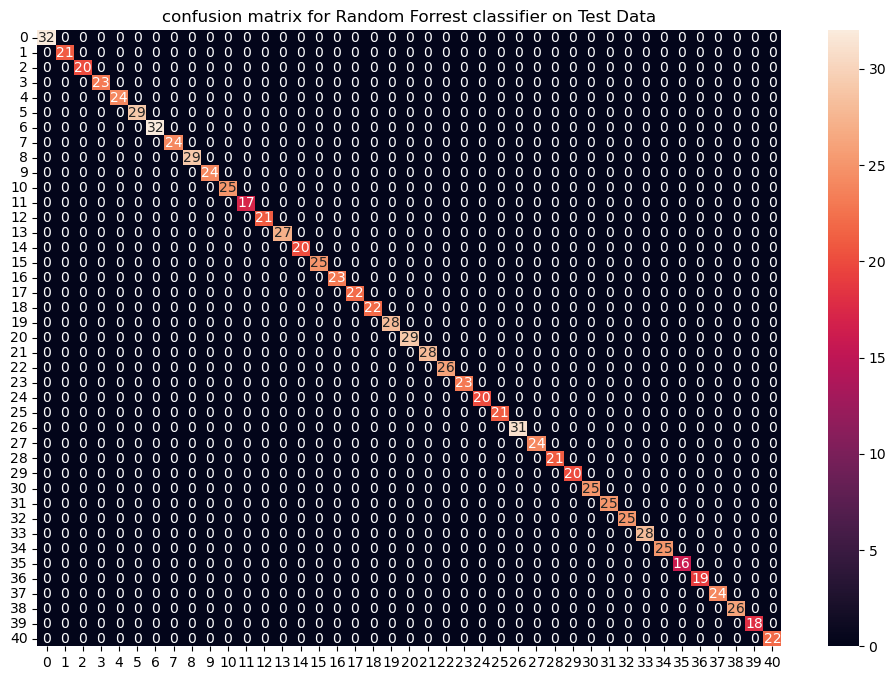

In [37]:
# Training and testing Random Forest Classifier
rf_model= RandomForestClassifier()
rf_model.fit(X_train, Y_train)
preds= rf_model.predict(X_test)
print(f'accuracy score based on training data using Random Forrest Classifier\
      :{accuracy_score(Y_train, rf_model.predict(X_train)) * 100}')
print(f'accuracy score based on test data using Random Forrest classifier\
      :{accuracy_score(Y_test, rf_model.predict(X_test)) * 100}')
cf_matrix= confusion_matrix(Y_test, preds)
plt.figure(figsize= (12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title('confusion matrix for Random Forrest classifier on Test Data')
plt.show()

Accuracy based on Test dataset for combined all model:      100.0


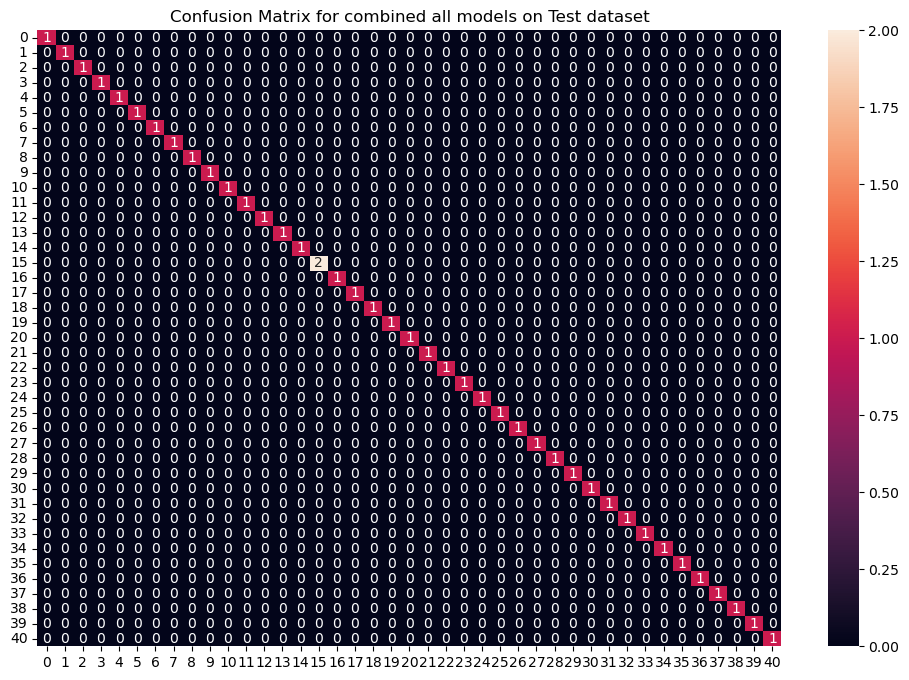

In [47]:
# Training the models on whole data
final_svm_model= SVC()
final_nb_model= GaussianNB()
final_rf_model= RandomForestClassifier()
final_svm_model.fit(X.values, Y)
final_nb_model.fit(X.values, Y)
final_rf_model.fit(X.values, Y)

# Reading the test data
test_data= pd.read_csv('./dataset/Testing.csv').dropna(axis= 1)
X_test= test_data.iloc[: , : -1]
Y_test= encoder.transform(test_data.iloc[: , -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds= final_svm_model.predict(X_test.values)
nb_preds= final_nb_model.predict(X_test.values)
rf_preds= final_rf_model.predict(X_test.values)

final_preds= [stats.mode([i, j, k], keepdims=False)[0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]
print(f'Accuracy based on Test dataset for combined all model:\
      {accuracy_score(Y_test, final_preds)* 100}')

cf_matrix= confusion_matrix(Y_test, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix for combined all models on Test dataset')
plt.show()

In [48]:
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptoms= X.columns.values
symptom_index= {}
for index, value in enumerate(symptoms):
    symptom= ' '.join([i.capitalize() for i in value.split('_')])
    symptom_index[symptom]= index
data_dict={
    'symptom_index': symptom_index,
    'predictions_classes': encoder.classes_
}

In [49]:
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms= symptoms.split(',')
    # creating input data for the models
    input_data= [0] * len(data_dict['symptom_index'])
    for symptom in symptoms:
        index= data_dict['symptom_index'][symptom]
        input_data[index]= 1
    
    # reshaping the input data and converting it
    # into suitable format for model predictions    
    input_data= np.array(input_data).reshape(1, -1)
    
    # generating individual outputs
    svm_prediction= data_dict['predictions_classes'][final_svm_model.predict(input_data)[0]]
    nb_prediction= data_dict['predictions_classes'][final_nb_model.predict(input_data)[0]]
    rf_prediction= data_dict['predictions_classes'][final_rf_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    final_prediction= statistics.mode([svm_prediction, nb_prediction, rf_prediction])
    predictions={
        'Random Forrest model prediction': rf_prediction,
        'Naive Bayes model prediction': nb_prediction,
        'SVM model prediction': svm_prediction,
        'Final prediction': final_prediction
    }
    
    return predictions


In [50]:
# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'Random Forrest model prediction': 'Fungal infection', 'Naive Bayes model prediction': 'Fungal infection', 'SVM model prediction': 'Fungal infection', 'Final prediction': 'Fungal infection'}
